In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00
time: 842 µs (started: 2024-07-22 08:52:53 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 37.5 s (started: 2024-07-22 08:52:53 +00:00)


In [ ]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p14_preprocessed.csv', '/content/data/data_p14_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/knn_classifier.py', '/content/knn_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

time: 9.36 s (started: 2024-07-22 08:53:30 +00:00)


# Error (recording) condition KNN classifier

Classification of the 7 different recording conditions including 1 correct singing condition and 6 conditions emulating common mistakes made by beginners.

It would be interesing to provide these models (once they are generalised), once trained, the beginner data to see what errors it identifies for different beginners when they are starting their singing development and check whether the output corresponds to what a singing teacher would identify as the main things that beginner should focus on.







### Note on hunched back condition
After further investigation, it seemed that for participant 14 (first participant for which an individual model is being developed), the hunched back case in the flow phonation recording session had limited ability to detect the face landmarks. After further analysis, it seemed this was because of the positioning of the participant in the recording condition in addition to the EEG sensor placement in the specific recording condition.

In [ ]:
RANDOM_STATE = 42
DATA_FILE = 'data/data_p14_preprocessed.csv'

from knn_classifier import train_and_test_knn, evaluate_model
from utils import prepare_data, plot_confusion_matrix, calculate_metrics_multi_class, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 2.31 s (started: 2024-07-22 08:55:45 +00:00)


## 1. Complete Data

Accuracy:  0.6736
Returned F1 score:  0.6749
Precision:  0.6912
Recall:  0.6736


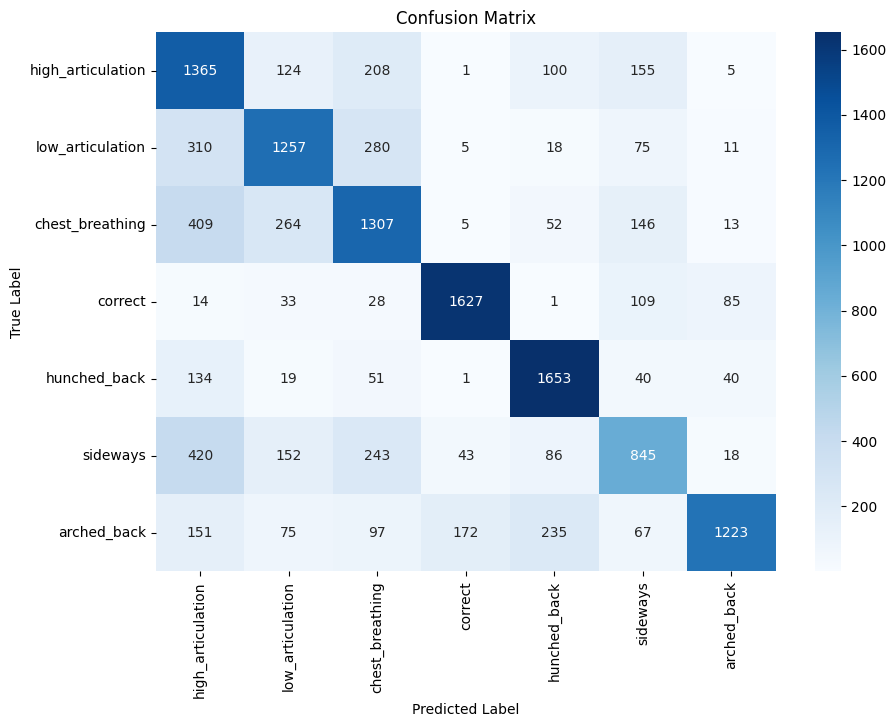

time: 25.2 s (started: 2024-07-22 08:55:47 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn')
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 features only

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Accuracy:  0.8021
Returned F1 score:  0.8029
Precision:  0.8046
Recall:  0.8021


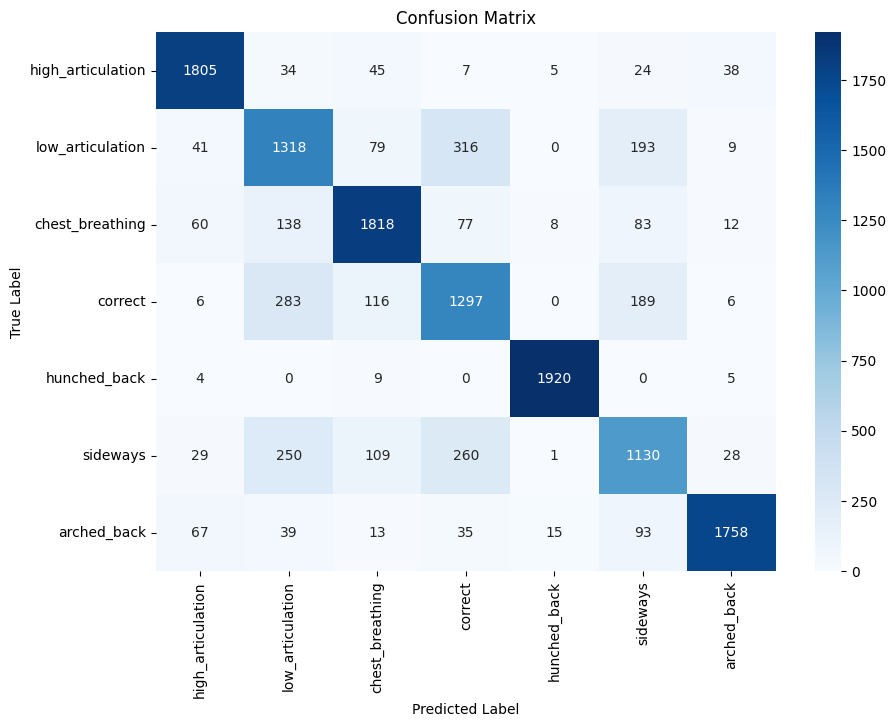

time: 6.47 s (started: 2024-07-22 08:56:13 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 2. Audio Only

In [ ]:
modalities = [
    "audio"
]

time: 988 µs (started: 2024-07-22 08:56:19 +00:00)


Accuracy:  0.234
Returned F1 score:  0.2302
Precision:  0.2365
Recall:  0.234


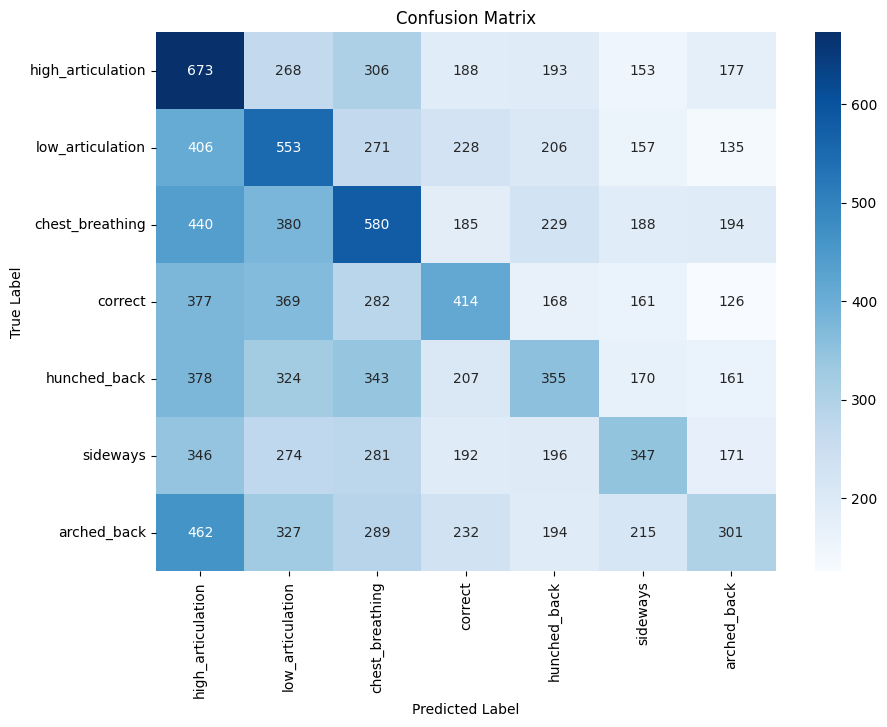

time: 12.4 s (started: 2024-07-22 08:56:19 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Only top 5 audio features

Selected features:  Index(['computer_spec_cent', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_3', 'computer_mfcc_7'],
      dtype='object')
Accuracy:  0.2013
Returned F1 score:  0.1972
Precision:  0.2022
Recall:  0.2013


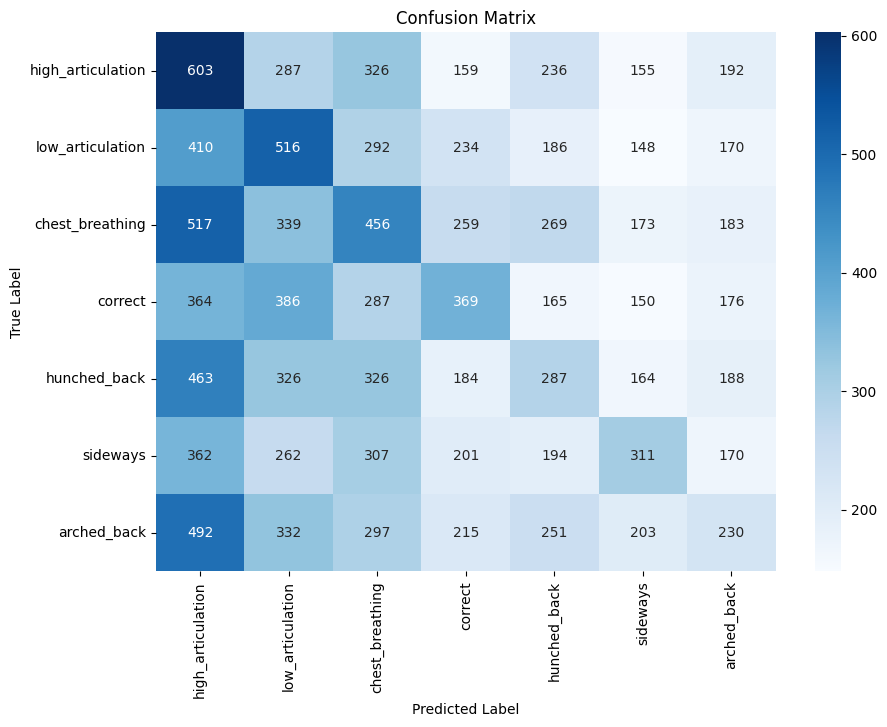

time: 5.71 s (started: 2024-07-22 08:56:32 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 3. Video Only

In [ ]:
modalities = [
    "video"
]

time: 1.47 ms (started: 2024-07-22 08:56:37 +00:00)


Accuracy:  0.9992
Returned F1 score:  0.9992
Precision:  0.9992
Recall:  0.9992


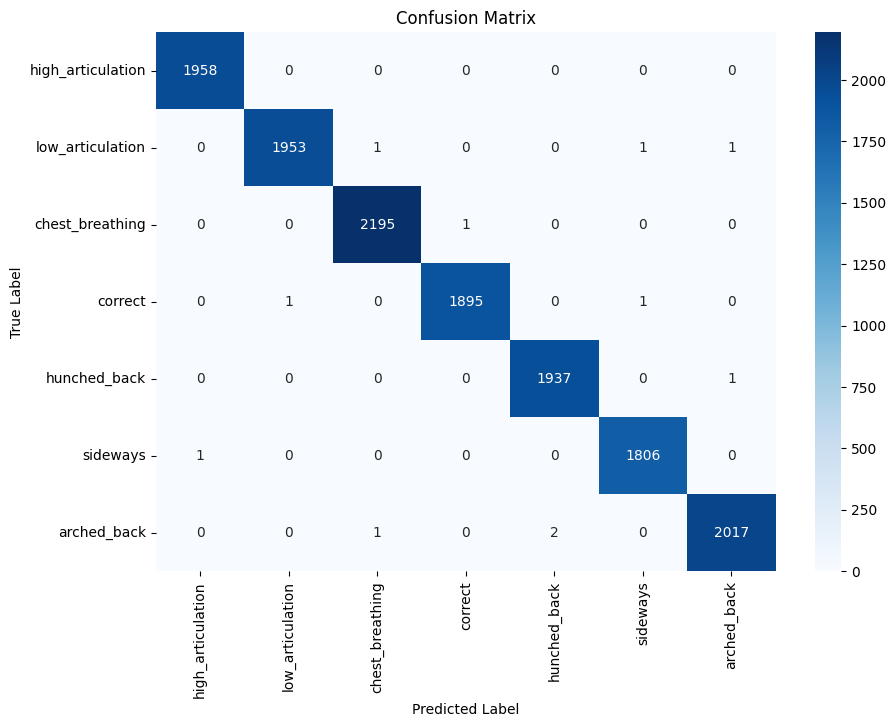

time: 26.5 s (started: 2024-07-22 08:56:38 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 video features

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Accuracy:  0.8021
Returned F1 score:  0.8029
Precision:  0.8046
Recall:  0.8021


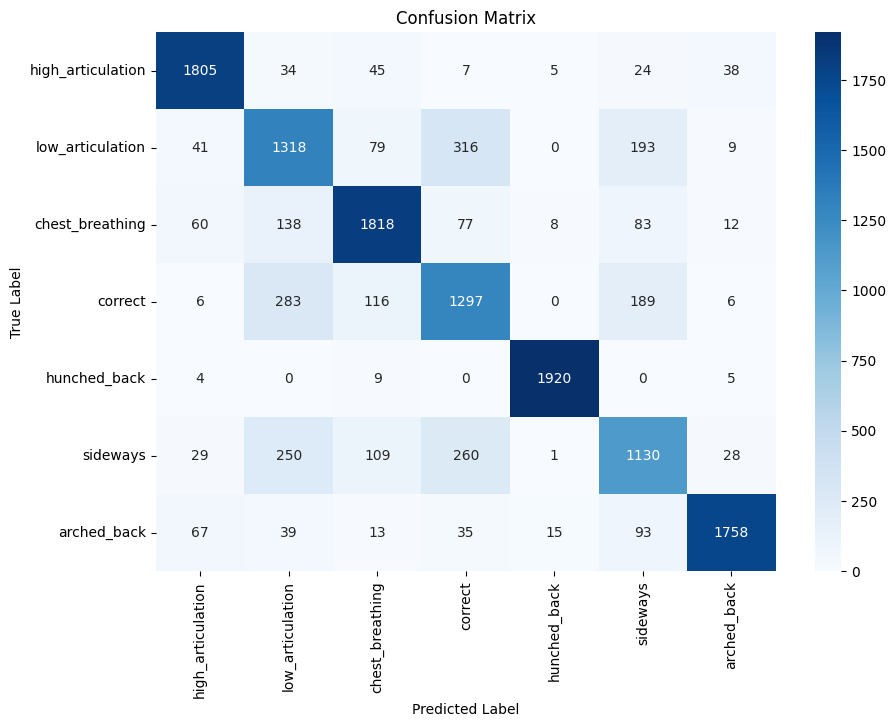

time: 5.86 s (started: 2024-07-22 08:57:04 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))



plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Only Biosignal Data

In [ ]:
modalities = [
    "biosignals"
]

time: 2.51 ms (started: 2024-07-22 08:57:10 +00:00)


Accuracy:  0.288
Returned F1 score:  0.289
Precision:  0.3005
Recall:  0.288


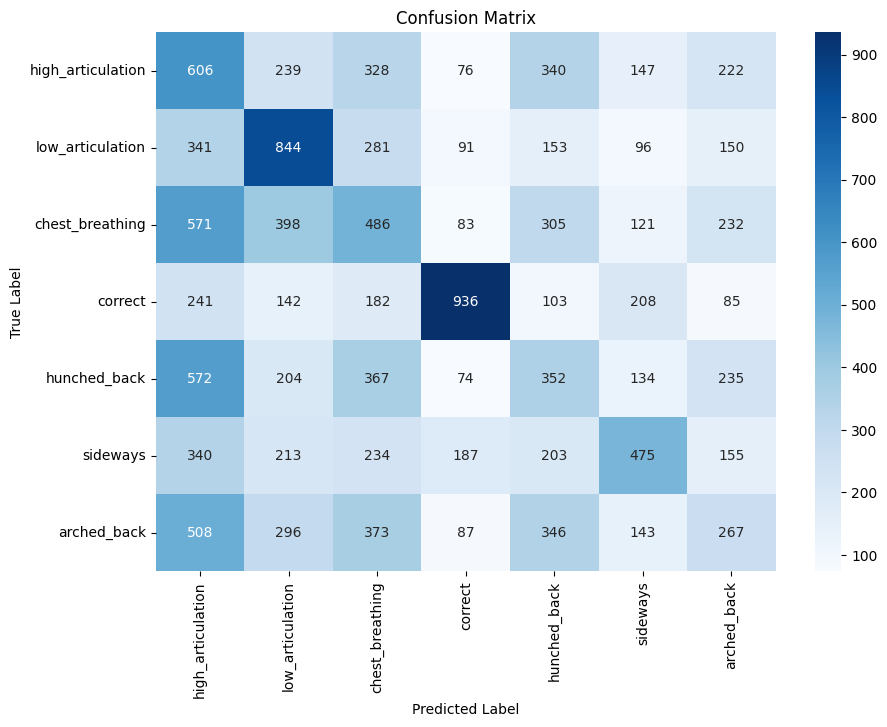

time: 5.82 s (started: 2024-07-22 08:57:10 +00:00)


In [ ]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall= calculate_metrics_multi_class(y_test, y_pred)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

# Posture only with audio

time: 5.83 s (started: 2024-07-22 08:57:10 +00:00)
